Here we will implement linear regression with one variable to predict profits for a food truck.  <br>
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new  
outlet. The chain already has trucks in various cities and you have data for profits and populations from  
the cities. <br>
The file ex1data1.txt  contains the dataset for our linear regression exercise.  <br>
The first column is the population of a city and the second column is the profit of  <br>
a food truck in that city. A negative value for profit indicates a loss. <br>
First, as with doing any machine learning task, we need to import certain libraries. <br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's read and have a look at the data <br>
Here we use the pandas read_csv function to read the comma separated values. <br>
Watch out as we are using US-formatted data : ',' to separate elements and '.' used as decimal separator  <br>
Also, we have used the head function to view the first few rows of our data.  <br>



In [2]:
data = pd.read_csv('Data/ex1data1.txt', header = None, delimiter = ",") #read from dataset
X = data.iloc[:,0] # read first column, will be put in a 'series' variable
y = data.iloc[:,1] # read second column, will be put in a 'series' variable
m = len(y) # number of training example (97)
print(data.head()) # view first few rows of the data


        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


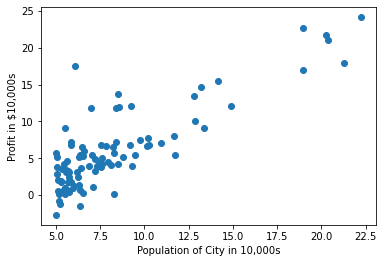

In [3]:
# Reading and Plotting the data
# Before starting on any task, try to visualize the data. 
# You can use a scatter plot to visualize this data, since it has only two properties to plot (profit and population).
# For multidimensional data : cannot be plotted on a 2-d or 3-d plot. 

plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()



Initializing and converting into an nparray, we want to make use of array manipulations (dot product eg) <br>
In the following lines, we add another dimension to our data to accommodate the intercept term,  <br>
we want to find the best values for Theta0 and Theta1 for the function y = Theta0 + Theta1 * x, by  <br>
getting the error/cost as small as possible.  <br>
We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01. <br>


In [4]:
print(type(X)) # should be a pd.Series()
X = X.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray
y = y.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray

# Will generate a warning:
# Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

# # Better w/o warning
# X = X.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray
# y = y.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray

theta = np.zeros([2,1]) # start off with a (0, 0) array
iterations = 10000 # 
alpha = 0.008 # magic number, defines the increase in change in Theta in every iteration we take
ones = np.ones((m,1))
X = np.hstack((ones, X)) 



<class 'pandas.core.series.Series'>


In [5]:
def computeCost(X, y, theta):
    # We are going to calculate the MSE (Mean Square Error). NOT the RMSE (Root Mean Square Error)
    #
    # FILL IN THE NECESSARY CODE. Return the cost.
    #
    #
    #    
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)



In [6]:
# What is the initial error/cost with the current theta0 and theta1 values = 0?
# Assign the cost value to the variable J
#
# FILL IN THE NECESSARY CODE.
#
#
#
J = computeCost(X, y, theta)
print(J)
# You get a cost of 32.072733877455676



32.072733877455676


In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    # First work out what the partial derivatives are, then apply the gradientDescent 
    # Parameters:
    # -----------
    # X: matrix with the input variables
    # y: the correct results
    # alpha: learning rate
    # iterations: The number of times the gradientDescent should run.
    #
    # FILL IN THE NECESSARY CODE. After the iterations are performed, return the theta0 and theta1 values.
    #
    #
    #

    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta



In [8]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)


[[-3.89577873]
 [ 1.19303343]]


In [9]:
# Can we improve on these results?
# Try with different values for the number of iterations and with different learning rates
# Try eg with as number of iterations: 500, 1500, 5000, 10000, 100000,...
# Try a different learning rate: 0.1, 0.03, 0.01, 0.003, 0.001, ...  

# theta values with 500    iterations : [-2.28286727, 1.03099898] <br>
# theta values with 1000   iterations : [-3.24140214, 1.1272942 ] <br>
# theta values with 1500   iterations : [-3.63029144, 1.16636235] <br>
# theta values with 10000  iterations : [-3.89578082, 1.19303364] <br>
# theta values with 100000 iterations : [-3.89578088, 1.19303364] <br>



In [10]:
J = computeCost(X, y, theta)
print(J)


4.476971375975599


<pre>

Cost with 500    iterations : 4.713809531116866, alpha = 0.01
Cost with 1000   iterations : 4.515955503078912, alpha = 0.01
Cost with 1500   iterations : 4.483388256587726, alpha = 0.01
Cost with 10000  iterations : 4.476971375975179, alpha = 0.01
Cost with 100000 iterations : 4.476971375975179, alpha = 0.01 # Doesn't seem to improve any longer

Cost with 500    iterations : 4.713809531116866, alpha = 0.03
Cost with 1000   iterations : inf, alpha = 0.03
Cost with 1000   iterations : 4.964695258134313, alpha = 0.003 # Goes in the wrong direction
Cost with 1000   iterations : 5.480269332020323, alpha = 0.001 # Goes even further in the wrong direction
Cost with 1000   iterations : 4.557238856950963, alpha = 0.008 # Better than before
Cost with 10000  iterations : 4.476971375975599, alpha = 0.008 # Improving. Very near to the best of the previous series. 
                                                               # But 0.01 is still better, when using the same amount of iterations.

</pre>



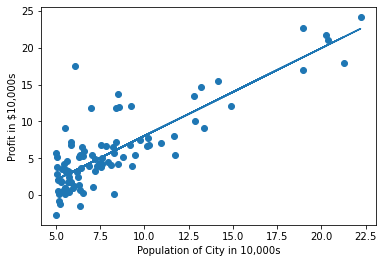

In [11]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()
